In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from glob import glob

In [2]:
ls data

 Volume in drive C has no label.
 Volume Serial Number is BA1A-7CCC

 Directory of C:\Users\eugur\Jupyter\ITU_Farplas_Deep_Learning\data

27.10.2020  14:35    <DIR>          .
27.10.2020  14:35    <DIR>          ..
27.10.2020  14:28    <DIR>          female
27.10.2020  16:18    <DIR>          female_crop
27.10.2020  14:29    <DIR>          male
14.01.2020  19:46            25.144 male_000281.jpg
27.10.2020  16:18    <DIR>          male_crop
22.03.2020  08:09         5.908.737 video.mp4
               2 File(s)      5.933.881 bytes
               6 Dir(s)  72.258.531.328 bytes free


In [3]:
female = glob('./data/female_crop/*.jpg')

In [4]:
male = glob('./data/male_crop/*.jpg')

In [5]:
path = female + male

In [6]:
# Gettin size of image
def getSize(path):
    
    img = Image.open(path)
    return img.size[0]

In [7]:
getSize(path[2])

74

In [8]:
# Create DataFrame
df = pd.DataFrame(data=path,columns=['path'])
df.head()

,path
0,./data/female_crop\1003_female.jpg
1,./data/female_crop\1005_female.jpg
2,./data/female_crop\1008_female.jpg
3,./data/female_crop\1009_female.jpg
4,./data/female_crop\100_female.jpg


In [9]:
df['size'] = df['path'].apply(getSize)

In [10]:
df.head()

,path,size
0,./data/female_crop\1003_female.jpg,141
1,./data/female_crop\1005_female.jpg,218
2,./data/female_crop\1008_female.jpg,74
3,./data/female_crop\1009_female.jpg,174
4,./data/female_crop\100_female.jpg,198


In [11]:
# EDA

In [12]:
df.describe()

,size
count,7296.000000
mean,146.145285
std,67.844668
min,26.000000
25%,89.000000
50%,135.000000
75%,197.000000
max,364.000000


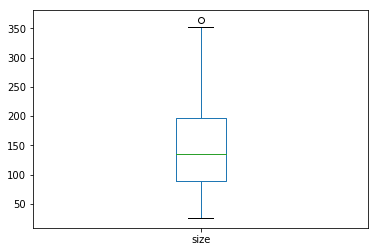

In [13]:
df['size'].plot('box')

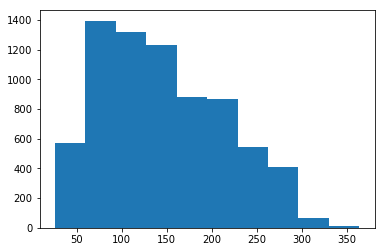

In [14]:
plt.hist(df['size'])
plt.show()

In [15]:
df_new = df[df['size'] > 60]

In [16]:
len(df_new)

6659

In [23]:
string = df_new['path'][0]
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [24]:
df['gender'] = df['path'].apply(gender)

In [26]:
df.head()

,path,size,gender
0,./data/female_crop\1003_female.jpg,141,female
1,./data/female_crop\1005_female.jpg,218,female
2,./data/female_crop\1008_female.jpg,74,female
3,./data/female_crop\1009_female.jpg,174,female
4,./data/female_crop\100_female.jpg,198,female


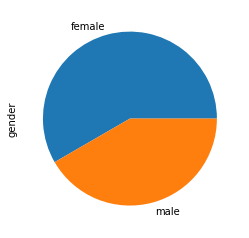

In [29]:
df['gender'].value_counts(normalize=True).plot(kind='pie')

In [30]:
df['gender'].value_counts(normalize=True)

female    0.58347
male      0.41653
Name: gender, dtype: float64

In [31]:
df_new['size'].min()

61

In [36]:
def resize_img(path_to_resize):
    img = cv2.imread(path_to_resize)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    size = gray.shape[0]
    if size >= 100:
        gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) #shrink
    else:
        gray_re = cv2.resize(gray,(100,100),cv2.INTER_AREA) # enlarge
    flat_img = gray_re.flatten()
    return flat_img

In [42]:
df_new.head()

,path,size,gender
0,./data/female_crop\1003_female.jpg,141,female
1,./data/female_crop\1005_female.jpg,218,female
2,./data/female_crop\1008_female.jpg,74,female
3,./data/female_crop\1009_female.jpg,174,female
4,./data/female_crop\100_female.jpg,198,female


In [41]:
df_new['gender'] = df_new['path'].apply(gender)

C:\Users\eugur\.conda\envs\pytorch_opencv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_new['structured_data'] = df_new['path'].apply(resize_img)

C:\Users\eugur\.conda\envs\pytorch_opencv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
df_new.head()

,path,size,gender,structured_data
0,./data/female_crop\1003_female.jpg,141,female,"[35, 36, 36, 36, 36, 36, 36, 35, 36, 37, 35, 3..."
1,./data/female_crop\1005_female.jpg,218,female,"[31, 37, 15, 49, 72, 64, 44, 70, 81, 93, 110, ..."
2,./data/female_crop\1008_female.jpg,74,female,"[34, 33, 28, 22, 22, 27, 31, 30, 23, 25, 32, 4..."
3,./data/female_crop\1009_female.jpg,174,female,"[72, 65, 55, 51, 50, 53, 49, 56, 54, 50, 48, 5..."
4,./data/female_crop\100_female.jpg,198,female,"[154, 154, 151, 150, 147, 129, 78, 37, 16, 12,..."


In [50]:
df1 = df_new['structured_data'].apply(pd.Series)

In [48]:
df1.head()

0    [35, 36, 36, 36, 36, 36, 36, 35, 36, 37, 35, 3...
1    [31, 37, 15, 49, 72, 64, 44, 70, 81, 93, 110, ...
2    [34, 33, 28, 22, 22, 27, 31, 30, 23, 25, 32, 4...
3    [72, 65, 55, 51, 50, 53, 49, 56, 54, 50, 48, 5...
4    [154, 154, 151, 150, 147, 129, 78, 37, 16, 12,...
Name: structured_data, dtype: object

In [51]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,35,36,36,36,36,36,36,35,36,37,...,106,114,125,129,130,135,121,99,103,114
1,31,37,15,49,72,64,44,70,81,93,...,132,132,132,134,134,136,136,133,138,136
2,34,33,28,22,22,27,31,30,23,25,...,31,32,39,39,37,34,31,30,30,29
3,72,65,55,51,50,53,49,56,54,50,...,150,151,150,150,149,152,151,153,147,148
4,154,154,151,150,147,129,78,37,16,12,...,179,182,188,187,173,178,166,165,162,143


In [52]:
df2 = pd.concat((df_new['gender'],df1),axis=1)

In [53]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,female,35,36,36,36,36,36,36,35,36,...,106,114,125,129,130,135,121,99,103,114
1,female,31,37,15,49,72,64,44,70,81,...,132,132,132,134,134,136,136,133,138,136
2,female,34,33,28,22,22,27,31,30,23,...,31,32,39,39,37,34,31,30,30,29
3,female,72,65,55,51,50,53,49,56,54,...,150,151,150,150,149,152,151,153,147,148
4,female,154,154,151,150,147,129,78,37,16,...,179,182,188,187,173,178,166,165,162,143


Text(0.5, 1.0, 'female')

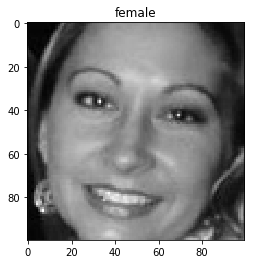

In [61]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'),cmap='gray')
plt.title(df2.loc[0]['gender'])

In [62]:
import pickle

In [63]:
pickle.dump(df2,open('./data/dataframe_images_100_100.pickle','wb'))